<a href="https://colab.research.google.com/github/sachincs3108/case_studies/blob/main/Mall_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: sachin yeshwant Rasam


--- roll_no:13 

--- Assignment:3- KMeans Algorithm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df_mall=pd.read_csv("/content/drive/MyDrive/pgp data sets/DataSets1/Mall_Customers (1).csv")

In [ ]:
df_mall.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
 df_mall=df_mall.drop("CustomerID",axis=1)

In [ ]:
df_mall.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [ ]:
df_mall.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#perform scaling
df_customer=df_mall.iloc[:,2:4]
df_customer.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
from sklearn.preprocessing import StandardScaler
df_scaled=StandardScaler().fit_transform(df_customer)

In [ ]:
df_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

In [ ]:
#finding optimal value for no.of clusters
wcss=[]
for i in range(2,11):
  kmod=KMeans(n_clusters=i,init="random")
  kmod.fit(df_scaled)
  wcss.append(kmod.inertia_)

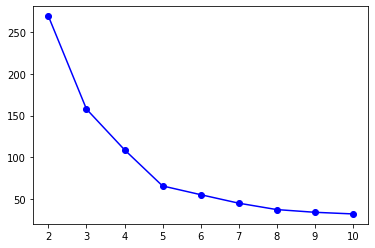

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(2,11),wcss,marker="o",c="blue")

In [ ]:
#creating final kmeans model with cluster number=5
kmod_final=KMeans(n_clusters=5,init="k-means++").fit(df_scaled)

In [ ]:
cl=kmod_final.predict(df_scaled)

In [ ]:
cl

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 3,
       4, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [ ]:
df_customer["cluster"]=cl
df_customer.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


Text(0, 0.5, 'Spending Score (1-100)')

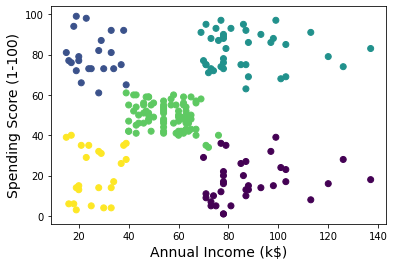

In [ ]:
#Visualization using scatterplot
plt.scatter(x=df_customer["Annual Income (k$)"],y=df_customer["Spending Score (1-100)"],c=cl)
#plt.label(x="Annual Income (k$)",y="Spending Score (1-100)")
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)

cl1= high income low spender(purple)
cl2=high income high spender(skyblue)
cl3=low income high spender(darkblue)
cl4=low income low spender(yellow)
cl5=moderate income moderate spender(green)